# 単一量子ビットゲート

前の章では、量子ビットが存在する可能性のあるすべての状態を調べました。量子ビットは2次元ベクトルで表すことができ、その状態は次の形式に制限されていることがわかりました。

$$ |q\rangle = \cos{(\tfrac{\theta}{2})}|0\rangle + e^{i\phi}\sin{\tfrac{\theta}{2}}|1\rangle $$

$\theta$および$\phi$は実数です。この章では、これらの状態間で量子ビットを変更する操作である _ゲート_ について説明します。ゲートの数とゲート間の類似性のため、この章は単調になる危険性があります。 これを回避するため、章全体の適切な場所に重要な考え方を紹介するいくつかの余談を含めました。

## 目次    

1. [パウリゲート](#pauli)    
    1.1 [Xゲート](#xgate)    
    1.2 [Y、Zゲート](#ynzgatez)    
2. [余談: X、Y、Z基底](#xyzbases)    
3. [アダマールゲート](#hgate)    
4. [余談: 異なる基底での測定](#measuring)    
5. [R<sub>ϕ</sub>ゲート](#rzgate)    
6. [I、S、Tゲート](#istgates)    
    6.1 [Iゲート](#igate)    
    6.2 [Sゲート](#sgate)    
    6.3 [Tゲート](#tgate)    
7. [一般的なU<sub>3</sub>ゲート](#generalU3)    

_原子で計算をおこなう_ では、いくつかのゲートに出会い、それらを使用して古典的な計算を実行しました。 量子回路の重要な特徴は、量子ビットの初期化と測定の間では、操作が *_いつも_* 可逆であることです。 その結果、量子回路で使用できるすべてのゲートも可逆です。 これらの可逆ゲートは、行列として表すか、ブロッホ球の周りの回転と考えることができます。

In [1]:
from qiskit import *
from math import pi
from qiskit.visualization import plot_bloch_multivector
%config InlineBackend.figure_format = 'svg' # Jupyterノートブックの場合

## 1. パウリゲート <a id="pauli"></a>

線形代数の章のパウリ行列に精通している必要があります。 ここで紹介する数学のいずれかが初めての場合は、線形代数の章を使用して、理解してもらう必要があります。 この章ではパウリ行列が非常に一般的に使用されるいくつかの量子ゲートを表すことができることがわかります。

### 1.1 Xゲート <a id="xgate"></a>

Xゲートは、パウリ-X行列で表されます。

$$ X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} = |0\rangle\langle1| + |1\rangle\langle0| $$

ゲートが量子ビットに与える影響を確認するには、量子ビットの状態ベクトルにゲートを掛けます。 Xゲートが状態$|0\rangle$と$|1\rangle$の振幅を切り替えることがわかります。

$$ X|0\rangle = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \end{bmatrix} = |1\rangle$$


<!--- Beware editing things inside <details> tags as it easily breaks when the notebook is converted to html --->
<details>
 <summary>備忘: ベクトルと行列の乗算 (ここをクリックして展開してください。)</summary>
  <p>行列の乗算は、前章で見た内積の一般化です。 （上記のように）ベクトルに行列を乗算する特定のケースでは、常にベクトルを返します。
  $$ M|v\rangle  = \begin{bmatrix}a & b \\ c & d \\\end{bmatrix}\begin{bmatrix}v_0 \\ v_1 \\\end{bmatrix}
                = \begin{bmatrix}a\cdot v_0 + b \cdot v_1 \\ c \cdot v_0 + d \cdot v_1\end{bmatrix} $$
  量子コンピューティングでは、基底ベクトルで行列を書くことができます。
  $$X = |0\rangle\langle1| + |1\rangle\langle0|$$
  これは、行列を使用するよりも明確な場合があります。さまざまな乗算の結果を確認できるためです。
  $$
      \begin{aligned}
      X|1\rangle & = (|0\rangle\langle1| + |1\rangle\langle0|)|1\rangle \\
                 & = |0\rangle\langle1|1\rangle + |1\rangle\langle0|1\rangle \\
                 & = |0\rangle \times 1 + |1\rangle \times 0 \\
                 & = |0\rangle
      \end{aligned}
  $$
  実際、次のようにケットとブラが乗算されているのを見てみます。
  $$ |a\rangle\langle b| $$
  これは<i>外積</i>と呼ばれ、次のルールに従います。
  $$
      |a\rangle\langle b| = 
      \begin{bmatrix}
              a_0 b_0 & a_0 b_1 & \dots  & a_0 b_n\\ 
              a_1 b_0 & \ddots  &        & \vdots \\
              \vdots  &         & \ddots & \vdots \\
              a_n b_0 & \dots   & \dots  & a_n b_n \\
      \end{bmatrix}
  $$
  これが実際にX行列に結果として表示されることがわかります。
  $$
      |0\rangle\langle1| + |1\rangle\langle0| = 
      \begin{bmatrix}0 & 1 \\ 0 & 0 \\\end{bmatrix} +
      \begin{bmatrix}0 & 0 \\ 1 & 0 \\\end{bmatrix} = 
      \begin{bmatrix}0 & 1 \\ 1 & 0 \\\end{bmatrix} = X
  $$
</details>

Qiskitでは、これを検証するための短い回路を作成できます。

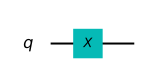

In [2]:
# |0> 量子ビットに対してゲート作用させてみましょう。
qc = QuantumCircuit(1)
qc.x(0)
qc.draw('mpl')

上記の結果を見てみましょう。 **注意** ここでは、ブロッホベクトルの代わりに量子ビットの状態ベクトルを取る `plot_bloch_multivector()`を使用しています。

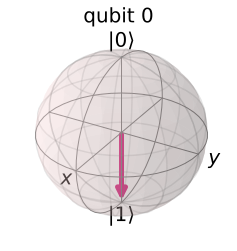

In [3]:
# 結果を見てみましょう
backend = Aer.get_backend('statevector_simulator')
out = execute(qc,backend).result().get_statevector()
plot_bloch_multivector(out)

確かに、量子ビットの状態は予想どおり$|1\rangle$です。 これは、ブロッホ球の *x軸* を中心とした$\pi$ラジアンによる回転と考えることができます。 Xゲートは、古典回路との類似性からNOTゲートとも呼ばれます。

### 1.2 Y、Zゲート  <a id="ynzgatez"></a>

Xゲートと同様に、YおよびZパウリ行列も量子回路のYおよびZゲートとして機能します。

$$ Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} \quad\quad\quad\quad Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} $$

$$ Y = i|0\rangle\langle1| - i|1\rangle\langle0| \quad\quad Z = |0\rangle\langle0| - |1\rangle\langle1| $$

そして当然のことながら、それらはそれぞれブロッホ球のy軸とz軸を中心に$\pi$だけ回転する作用をうみます。

以下は、ブロッホ球で量子ビットの状態を表示するウィジェットです。いずれかのボタンを押すと、量子ビットにゲートが実行されます。


In [4]:
# このセルのコードを実行してウィジェットを表示します。
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

Qiskitでは、次の方法でYゲートとZゲートを回路に適用できます。

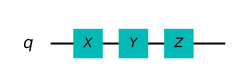

In [5]:
qc.y(0) # 量子ビット0にYゲートを適用します。
qc.z(0) # 量子ビット0にZゲートを適用します。
qc.draw('mpl')

## 2. 余談: X、Y、Z基底 <a id="xyzbases"></a>

<details>
  <summary>備忘: 行列の固有ベクトル (ここをクリックして展開してください。)</summary>
ベクトルと行列を乗算すると、ベクトルが生成されることを確認しました。
     
$$
    M|v\rangle  = |v'\rangle \leftarrow \text{新しいベクトル}
    $$
適切なベクトルと行列を選択した場合、この行列乗算がスカラーによる乗算を実行するのと同じである場合を見つけることができます。
      
$$
    M|v\rangle  = \lambda|v\rangle
    $$
（上記では、$M$は行列で、$\lambda$はスカラーです）。 行列$M$の場合、この性質を持つベクトルは、$M$の<i>固有ベクトル</i>と呼ばれます。 たとえば、Z行列の固有ベクトルは$|0\rangle$および$|1\rangle$の状態です。

$$
      \begin{aligned}
      Z|0\rangle & = |0\rangle \\
      Z|1\rangle & = -|1\rangle
      \end{aligned}
      $$
私たちは量子ビットの状態を記述するためにベクトルを使用するので、これらのベクトルをしばしば<i>固有状態</i>と呼びます。 固有ベクトルは量子計算で非常に重要であり、それらをしっかりと把握することが重要です。
</details>

量子ビットが$|0\rangle$または$|1\rangle$にあるとき、Zゲートが量子ビットに影響を与えないように見えることもあります。これは、状態$|0\rangle$および$|1\rangle$がZゲートの2つの _固有状態_ であるためです。 実際、 _計算基底_ （状態$|0\rangle$および$|1\rangle$によって形成される基底）は、Z基底と呼ばれることがよくあります。 Z基底は、私たちが使用できる唯一の基底ではありません。そのほかの基底として一般的なものは、Xゲートの固有状態によって形成されるX基底です。X基底の2つのベクトルを$|+\rangle$および$|-\rangle$と呼びます。

$$ |+\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle) = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ 1 \end{bmatrix}$$

$$ |-\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle - |1\rangle) = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ -1 \end{bmatrix} $$

あまり一般的ではないもう1つの基底は、Yゲートの固有状態によって形成されるものです。 それは次のように記述されます。

$$ |\circlearrowleft\rangle, \quad |\circlearrowright\rangle$$

これらの基底を計算する演習を用意しました。 事実、無数の基底があります。 1つの基底を構成するには、2つの直交ベクトルが必要です。

### 練習問題
1. $|+\rangle$および$|-\rangle$が実際にXゲートの固有状態であることを確認してください。
2. 上の状態は、どのような固有値を持っていますか。
3. これらの固有値がブロッホ球に表示されないのはなぜですか？
4. Yゲートの固有状態と、ブロッホ球上の座標を見つけてください。

パウリゲートのみを使用すると、初期化された量子ビットを$|0\rangle$または$|1\rangle$以外の状態に移動することは不可能です。つまり、重ね合わせを行うことはできません。 より興味深い状態を作成するには、より多くのゲートが必要になります！

## 3. アダマールゲート  <a id="hgate"></a>

アダマールゲート（Hゲート）は以下のような行列です。

$$ H = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} $$

これにより、以下の変換が実行されることがわかります。

$$ H|0\rangle = |+\rangle $$

$$ H|1\rangle = |-\rangle $$

この変換は、ブロッホベクトル `[1,0,1]`（x軸とz軸の間の線）を中心とする回転、またはXとZの基底間の量子ビットの状態の変換と考えることができます。

以下のウィジェットを使用して、これらのゲートを体感してみてください。


In [6]:
# このセルのコードを実行してウィジェットを表示します。
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli+h')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

### 練習問題
1. Hゲートをベクトル$|0\rangle$、$|1\rangle$、$|+\rangle$および$|-\rangle$の外積として記述してください。
2. ゲートを連ねたHZHを任意の量子ビット状態に適用することは、Xゲートを適用することと同等であることを示してください。
3. Yゲート（グローバルフェーズを無視）と同等のX、Z、Hゲートの組み合わせを見つけてください。

## 4. 余談: 異なる基底での測定  <a id="measuring"></a>

Z軸は本質的に特別なものではなく、他にも無限に多くの基底があることがわかりました。 測定と同様に、常に計算ベース（Z基底）で測定する必要はなく、任意の基底で量子ビットを測定できます。

例として、X基底で測定してみましょう。 $|+\rangle$または$|-\rangle$を測定する確率を計算できます。

$$ p(|+\rangle) = |\langle+|q\rangle|^2, \quad p(|-\rangle) = |\langle-|q\rangle|^2 $$

そして測定後、これらの2つの状態のいずれかに量子ビットがあることが保証されます。 QiskitはZ基底でのみ測定できるため、X基底で測定するにはアダマールゲートを使用して独自に作成する必要があります。


In [7]:
from qiskit.extensions import Initialize # Inititialize機能をインポートします。
# X測定関数を作成します。
def x_measurement(qc,qubit,cbit):
    """Measure 'qubit' in the X-basis, and store the result in 'cbit'"""
    qc.h(qubit)
    qc.measure(qubit, cbit)
    qc.h(qubit)
    return qc

# 量子ビットを初期化して測定します。
qc = QuantumCircuit(1,1)
initial_state = [0,1]
initialize_qubit = Initialize(initial_state)
qc.append(initialize_qubit, [0])
x_measurement(qc, 0, 0)
qc.draw()

┌─────────────────┐┌───┐┌─┐┌───┐
q_0: ┤ Initialize(0,1) ├┤ H ├┤M├┤ H ├
     └─────────────────┘└───┘└╥┘└───┘
c_0: ═════════════════════════╩══════

以前2つのHゲートの間にZゲートを挟むことでXゲートを作成できることを確認しました。

$$ X = HZH $$

ここでは、2つのHゲートの間にZ測定を挟んでX測定を作成しています。 それでは、結果を見てみましょう。


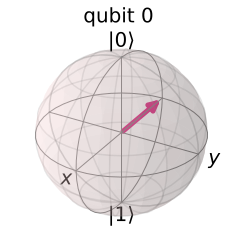

In [8]:
backend = Aer.get_backend('statevector_simulator') # Qiskitに回路のシミュレーション方法を伝えます。
out_state = execute(qc,backend).result().get_statevector() # シミュレーションを行い、状態ベクトルを返します。
plot_bloch_multivector(out_state) # 出力状態ベクトルを表示する

$|1\rangle$の状態で量子ビットを初期化しましたが、測定後、量子ビットが$|+\rangle$または$|-\rangle$の状態に飛び移ることがわかります。 セルを再度実行すると、異なる結果が表示されますが、量子ビットの最終状態は常に$|+\rangle$または$|-\rangle$になります。

### 練習問題
1.	$|+\rangle$状態で量子ビットを初期化する場合、$|-\rangle$状態でそれを測定する確率はどれくらいですか？
2.	Qiskitを使用して、$|+\rangle$と$|-\rangle$の状態で$|0\rangle$量子ビットを測定する確率を表示してください。（**ヒント：** `.get_counts()`および `plot_histogram()`を使用することができます。)
3.	Y基底で測定する関数を作成してみてください。

さまざまな基底で測定することで、ハイゼンベルクの有名な不確実性原理を見ることができます。 Z基底で状態を測定する確実性があると、X基底で特定の状態を測定する確実性がすべて失われ、その逆も同様です。 よくある誤解は、不確実性は機器の制限によるものであるというものですが、ここでは不確かさが実際に量子ビットの性質の一部であることがわかります。

たとえば、量子ビットを$|0\rangle$状態にした場合、Z基底での測定は$|0\rangle$であることが確実ですが、X基底での測定は完全にランダムです！ 同様に、量子ビットを$|-\rangle$状態にした場合、X基底での測定は$|-\rangle$であることが確実ですが、Z基底での測定は完全にランダムになります。

より一般的には、 _量子システムの状態がどのようなものであっても、特定の結果をもたらす測定が常に存在します。_

Hゲートの導入により、いくつかの興味深い現象を探ることができましたが、量子操作にはまだ非常に制限があります。 ここで、新しいタイプのゲートを紹介しましょう。

## 5. R<sub>ϕ</sub>ゲート  <a id="rzgate"></a>

R<sub>ϕ</sub>ゲートは _パラメータ化されたゲート_ です。つまり、何をすべきかを正確に伝えるには数字($\phi$)が必要です。R<sub>ϕ</sub>ゲートは、Z軸を中心に$\phi$の回転を実行します（そのため、R<sub>z</sub>ゲートとも呼ばれます）。 以下のような行列です。

$$
R_\phi = \begin{bmatrix} 1 & 0 \\ 0 & e^{i\phi} \end{bmatrix}
$$

$\phi$は実数です。

以下のウィジェットを使用してR<sub>ϕ</sub>ゲートを体感してみてください。スライダーを使用して$\phi$を指定してください。


In [9]:
# このセルのコードを実行してウィジェットを表示します。
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli+h+rz')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

Qiskitでは、`rz(phi,qubit)`を使用してR<sub>ϕ</sub>ゲートを指定します。

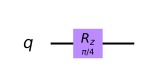

In [10]:
qc = QuantumCircuit(1)
qc.rz(pi/4, 0)
qc.draw('mpl')

ZゲートはR<sub>ϕ</sub>ゲートの特殊なケースで、$\phi=\pi$であることに気付くでしょう。 実際、この章で言及する3つの一般的に参照されるゲートがあり、それらはすべてR<sub>ϕ</sub>ゲートの特殊なケースです。

## 6. I、S、Tゲート  <a id="istgates"></a>

### 6.1 Iゲート  <a id="igate"></a>

まずIゲート（別名「Idゲート」または「Identityゲート」）があります。 これは単に何もしないゲートです。 その行列は単位行列です。

$$
I = \begin{bmatrix} 1 & 0 \\ 0 & 1\end{bmatrix}
$$

回路内の任意の場所にIゲートを適用しても、量子ビットの状態には影響がないため、これは何もしないゲートと見なすこともできます。 このゲートの存在理由は主に2つの理由があります。1つは、計算でよく使用されるためです。たとえば、Xゲートが自分自身の逆行列であることを証明します。

$$ I = XX $$

2つ目は、実際のハードウェアを検討するときに、「何もしない」または「なし」の操作を指定することがしばしば役立つためです。

#### 練習問題
1. Iゲートの固有状態は何でしょうか。

### 6.2 Sゲート <a id="sgate"></a>

次に言及するゲートはSゲート($\sqrt{Z}$ゲートとも呼ばれます）です。これは、$\phi=\pi/2$のR<sub>ϕ</sub>ゲートです。ブロッホ球の周りを1/4回転します。 この章でこれまでに紹介したすべてのゲートとは異なり、Sゲートは自分自身の逆行列では **ない** ことに注意してください。 その結果、S<sup>†</sup>ゲート（「Sダガー」、「Sdg」、または$\sqrt{Z}^\dagger$ゲートも同様）というものがあります。S<sup>†</sup>ゲートは$\phi=-\pi/2$のR<sub>ϕ</sub>ゲートです。

$$ S = \begin{bmatrix} 1 & 0 \\ 0 & e^{\frac{i\pi}{2}} \end{bmatrix}, \quad  S^\dagger = \begin{bmatrix} 1 & 0 \\ 0 & e^{-\frac{i\pi}{2}} \end{bmatrix}$$

「$\sqrt{Z}$ゲート」という名前は、2つの連続して適用されたSゲートが1つのZゲートと同じ効果を持つという事実によるものです。

$$ SS|q\rangle = Z|q\rangle $$

この表記法は、量子計算全体で共通です。

QiskitでSゲートを追加するには、

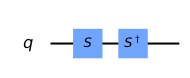

In [11]:
qc = QuantumCircuit(1)
qc.s(0)   # Sゲートを量子ビット0に適用します。
qc.sdg(0) # Sdgゲートを量子ビット0に適用します。
qc.draw('mpl')

### 6.3 Tゲート <a id="tgate"></a>

Tゲートは非常に一般的に使用されるゲートであり、$\phi=\pi/4$のR<sub>ϕ</sub>ゲートです。

$$ T = \begin{bmatrix} 1 & 0 \\ 0 & e^{\frac{i\pi}{4}} \end{bmatrix}, \quad  T^\dagger = \begin{bmatrix} 1 & 0 \\ 0 & e^{-\frac{i\pi}{4}} \end{bmatrix}$$

Sゲートと同様に、Tゲートは$\sqrt[4]{Z}$ゲートとしても知られています。

Qiskitでは、

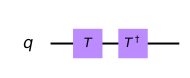

In [12]:
qc = QuantumCircuit(1)
qc.t(0)   # Tゲートを量子ビット0に適用します。
qc.tdg(0) # Tdgゲートを量子ビット0に適用します。
qc.draw('mpl')

以下のウィジェットを使用して、この章でこれまでに紹介したすべてのゲートを試すことができます。

In [13]:
# このセルのコードを実行してウィジェットを表示します。
from qiskit_textbook.widgets import gate_demo
gate_demo()

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

## 7. 一般的なU<sub>3</sub>ゲート  <a id="generalU3"></a>

前に見たように、I、Z、S、Tゲートはすべて、より一般的なR<sub>ϕ</sub>ゲートの特殊なケースです。 同様に、U<sub>3</sub>ゲートは、すべての単一量子ビット量子ゲートの中で最も一般的です。 これは、次の形式でパラメータ化されたゲートです。

$$
U_3(\theta, \phi, \lambda) = \begin{bmatrix} \cos(\theta/2) & -e^{i\lambda}\sin(\theta/2) \\
            e^{i\phi}\sin(\theta/2) & e^{i\lambda+i\phi}\cos(\theta/2)
     \end{bmatrix}
$$

この章のすべてのゲートは$U_3(\theta,\phi,\lambda)$として指定できますが、あまりみかけません。

Qiskitは、U<sub>2</sub>およびU<sub>1</sub>ゲートも提供します。これらは、$\theta=0$および$\theta=\phi=0$であるU<sub>3</sub>ゲートの特定のケースです。U<sub>1</sub>ゲートはR<sub>ϕ</sub>ゲートと同等であることがわかります。

$$
\begin{aligned}
U_3(\tfrac{\pi}{2}, \phi, \lambda) = U_2 = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & -e^{i\lambda} \\
            e^{i\phi} & e^{i\lambda+i\phi}
     \end{bmatrix}
& \quad &
U_3(0, 0, \lambda) = U_1 = \begin{bmatrix} 1 & 0 \\
            0 & e^{i\lambda}\\
     \end{bmatrix}
\end{aligned}
$$

実際のIBM量子ハードウェアで実行する前に、すべての単一量子ビット操作は$U_1$、$U_2$、および$U_3$にコンパイルされます。 このため、 _物理ゲート_ と呼ばれることもあります。

ここでは言及していませんが、可能なゲートの数は無限であり、これにはR<sub>x</sub>およびR<sub>y</sub>ゲートも含まれることは明らかです。 また、Z基底は、特別なことは何もないですが、標準の計算基底として選択されていることに注意してください。 そのため、SゲートとTゲートには名前がありますが、X基底とY基底におけるSやTに対応する名前はありません。（例：$\sqrt{X}$と$\sqrt[4]{Y}$）。

In [14]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.13.0',
 'qiskit-aer': '0.5.0',
 'qiskit-ignis': '0.3.0',
 'qiskit-ibmq-provider': '0.6.0',
 'qiskit-aqua': '0.6.5',
 'qiskit': '0.18.0'}